###### Linear Regression

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

###### 1. Collecting the data

In [2]:
#Loading the dataset
file = pd.read_excel(r"D:\Excel\releted to datascience excel files\supermarket_sales.xlsx")
file.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#printing the columns of the dataset
file.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
#printing the dimensions of the dataset
file.shape

(8523, 12)

In [5]:
#printing the datatypes of the dataset columns.
file.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

###### 2. Analyse data

In [6]:
#printing the statistical details of the dataset
file.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8419.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.906882,1997.831867,2181.288914
std,4.643456,0.051598,62.272160,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.760700,1987.000000,834.247400
50%,12.600000,0.053931,142.915400,1999.000000,1794.331000
75%,16.850000,0.094585,185.576600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:ylabel='Frequency'>

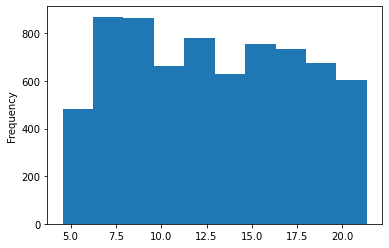

In [7]:
#create the histogram for the item_weight
file["Item_Weight"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

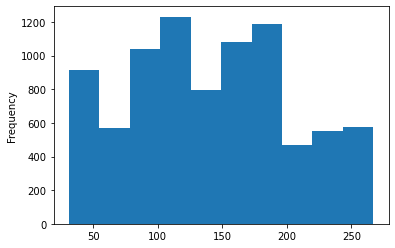

In [8]:
#create the histogram for the item_mrp
file["Item_MRP"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

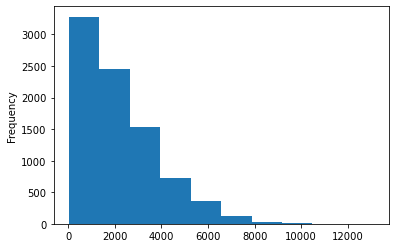

In [9]:
#create the histogram for the item_mrp
file["Item_Outlet_Sales"].plot.hist()

In [10]:
#print the correlation of the Datasets
file.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.028900,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.002400,-0.074834,-0.128625
Item_MRP,0.028900,-0.002400,1.000000,0.006895,0.568769
Outlet_Establishment_Year,-0.011588,-0.074834,0.006895,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.568769,-0.049135,1.000000


<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

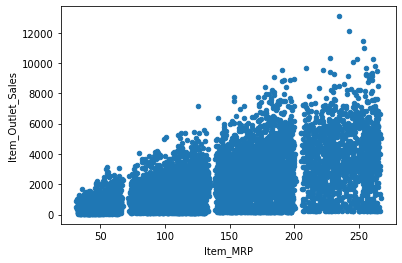

In [11]:
# Now making the scatter plot for the Item_MRP and Item_Outlet_Sales
file.plot.scatter("Item_MRP","Item_Outlet_Sales")

<AxesSubplot:>

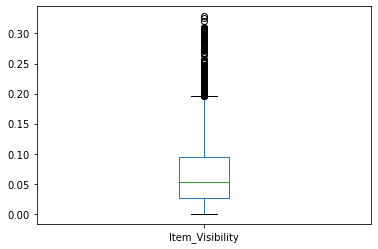

In [12]:
#doing box plot for the item visibility
file["Item_Visibility"].plot.box()

<AxesSubplot:>

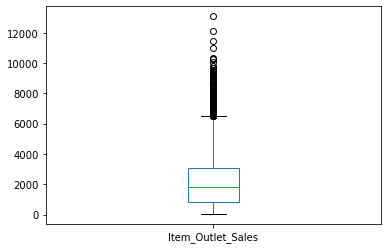

In [13]:
#doing box plot for the item_outlet_establishment_year
file["Item_Outlet_Sales"].plot.box()

###### 3. Data wrangling/ Data cleaning

In [14]:
#check the null values are present or not in the dataset and sum all the null values
file.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                      104
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
#Now detete the columns, that having the string values
file.drop(["Item_Visibility","Outlet_Establishment_Year","Item_Identifier","Outlet_Identifier"],axis=1,inplace=True)

In [16]:
#check the dimensions of the dataset
file.shape

(8523, 8)

<AxesSubplot:>

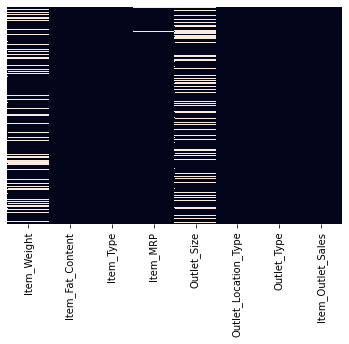

In [17]:
#plot the heatmap for understanding the null values
sns.heatmap(file.isnull(),yticklabels = False,cbar = False)

In [18]:
mean1 = file["Item_Weight"].mean()
mean1

12.857645184136183

In [19]:
mean2 = file["Item_MRP"].mean()
mean2

140.9068820762561

In [20]:
mode1 = file["Outlet_Size"].mode()
mode1

0    Medium
dtype: object

In [21]:
file["Item_Weight"].fillna(value = mean1, inplace = True)

In [22]:
file["Item_MRP"].fillna(value = mean2, inplace = True)

In [23]:
file["Outlet_Size"] = file["Outlet_Size"].fillna(file["Outlet_Size"].mode()[0])

In [24]:
file.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Type               0
Item_MRP                0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [25]:
file.shape

(8523, 8)

In [26]:
#Now make dummies for the categorical data
file = pd.get_dummies(file)

In [28]:
#check the dimensions of the dataset again
file.shape

(8523, 34)

In [29]:
#print the dtypes of the dataset now
file.dtypes

Item_Weight                        float64
Item_MRP                           float64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  uint8
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Fat_Content_low fat             uint8
Item_Fat_Content_reg                 uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_S

In [30]:
#print the first 10 lines of the dataset
file.head(10)

,Item_Weight,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300000,249.8092,3735.1380,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920000,48.2692,443.4228,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500000,141.6180,2097.2700,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200000,182.0950,732.3800,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8.930000,53.8614,994.7052,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
5,10.395000,51.4008,556.6088,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
6,13.650000,57.6588,343.5528,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
7,12.857645,107.7622,4022.7636,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,16.200000,96.9726,1076.5986,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
9,19.200000,187.8214,4710.5350,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


###### 4.Training and Model building

In [33]:
#Now drop the Item_Outlet_Sales to making the other columns as the indipendent variables
x = file.drop("Item_Outlet_Sales",axis = 1)

In [34]:
#Now make the dependent variable also
y=file["Item_Outlet_Sales"]

In [35]:
#import the libraries and model_selection method
import sklearn
from sklearn.model_selection import train_test_split

In [36]:
#Now devide the dataset as train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [37]:
#import the linear_regression algorithm
from sklearn.linear_model import LinearRegression

In [38]:
#creating an instance for the linear_regression
lreg = LinearRegression()

In [39]:
#Now we have to fit the model and pass the x_train and y_train to fit()
lreg.fit(x_train, y_train)

LinearRegression()

In [40]:
#making the predictions on the validation set
prediction = lreg.predict(x_test)

genarating te evaluation metric. in this we are using the RMSLE.

In [41]:
#defining a function which will return the RMSLE score
def rmsle(y, y_):
    y = np.exp(y), #Taking the exponential as we took the login of target variable
    y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2)**2
    return np.sqrt(np.mean(calc))

In [42]:
rmsle(y_test, prediction)

C:\Users\myoge\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-41-30a601e6d8a3>:4: RuntimeWarning: overflow encountered in exp
  y_ = np.exp(y_)
<ipython-input-41-30a601e6d8a3>:7: RuntimeWarning: overflow encountered in square
  calc = (log1 - log2)**2


inf

In [43]:
test_prediction = lreg.predict(x_test)

In [44]:
lreg.score(x_test,y_test)

0.5604077674377886

In [45]:
#performence of our model R_square model
lreg.score(x_test,y_test)

0.5604077674377886

In [46]:
#checking the performance of a train_dataset
lreg.score(x_train,y_train)

0.5587650405306217